## Imports and definitions

In [8]:
import ot
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import cv2
import glob
import itertools
import sys
import ot
from utils.image import Image
from utils.Visualizations import *
from utils.utils import *

In [2]:
dotmark_pictures_path = "..\\DOTmark_1.0\\Pictures\\"
full_path = os.path.join(os.getcwd(), dotmark_pictures_path)

In [3]:
resolutions = [32, 64, 128, 256, 512]
image_numbers = ['01','02','03','04','05','06','07','08','09','10']

In [4]:
categories_pattern = os.path.join(dotmark_pictures_path, "*")
category_dirs = [path for path in glob.glob(categories_pattern) if os.path.isdir(path)]
categories_pattern = os.path.join(dotmark_pictures_path, "*")
category_names = [os.path.basename(category) for category in category_dirs if os.path.isdir(category)]
for category in category_names:
    print(category)

CauchyDensity
ClassicImages
GRFmoderate
GRFrough
GRFsmooth
LogGRF
LogitGRF
MicroscopyImages
Shapes
WhiteNoise


## Reading images

In [5]:
image_1_index = 0
image_2_index = 1
resolution = 32

In [6]:
image1 = Image(resolution, category_names[0], image_1_index, full_path)
image2 = Image(resolution, category_names[0], image_2_index, full_path)


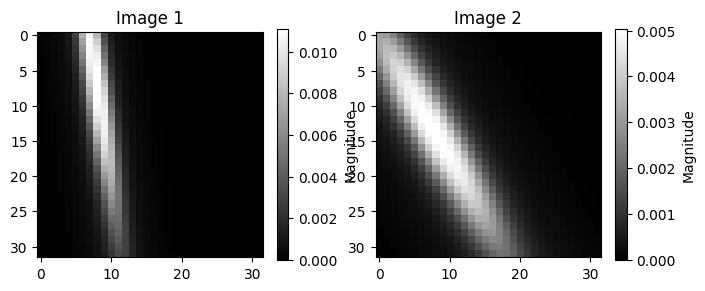

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3))
create_subplot(axs[0], image1.image, "Image 1")
create_subplot(axs[1], image2.image, "Image 2")

In [15]:
cost_matrix = calculate_costs(image1.image.shape)

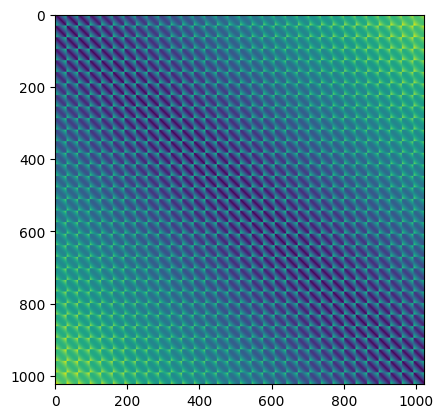

In [19]:
plt.imshow(cost_matrix)
plt.show()

In [20]:
ot.emd2(image1.image.flatten(), image2.image.flatten(), cost_matrix)

3.85597850768735

## Scaling up, looking into all pairs of images:

In [13]:
pairs = list(itertools.combinations(image_numbers, 2))

In [20]:
SNR_values = np.logspace(start=3, stop=-2, num=31)

In [ ]:
df_im_l1 = pd.DataFrame()
category = category_names[0]
res = 32
num_samples = 50
category_dir = os.path.join(full_path, category)

for SNR in SNR_values:
    for image_pair in pairs:
        im1 = Image(res, category, image_pair[0], full_path)
        im2 = Image(res, category, image_pair[1], full_path)         
        for i in range(num_samples):
            continue

MemoryError: Unable to allocate 512. GiB for an array with shape (262144, 262144, 2) and data type int32

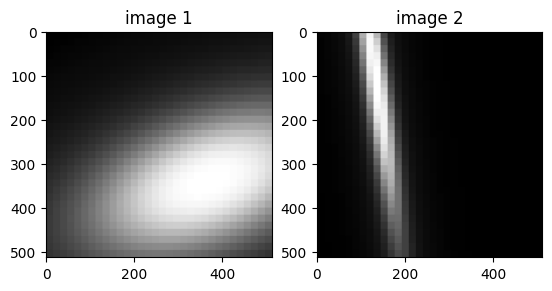

In [38]:
df_im_l1 = pd.DataFrame()
for category in category_names:
    category_dir = os.path.join(full_path, category)
    for resolution in resolutions:
        for SNR in SNR_values:
            for image_pair in pairs:
                #Here we would like to noise and compare each pair of images. We would want to create a confusion matrix
                #We essentially want this step to output 3 things:
                # Conf_mat(I1_noised,I2_noised)
                # Conf_mat(I1, I2)
                # emd(I, I_tilde) for every image, only thing to think about is whether we want to noise at every stage or not.
                path_im1 = os.path.join(category_dir, f"picture{resolution}_10{image_pair[0]}.png")
                im1 = cv2.imread(path_im1, cv2.IMREAD_GRAYSCALE)
                path_im2 = os.path.join(category_dir, f"picture{resolution}_10{image_pair[1]}.png")
                im2 = cv2.imread(path_im1, cv2.IMREAD_GRAYSCALE)

                plt.subplot(1,2,1)
                plt.title('image 1')
                plt.imshow(image2, cmap='gray')
                
                plt.subplot(1,2,2)
                plt.title('image 2')
                plt.imshow(image, cmap='gray')
                                
                df_im_l1 = run_experiment_and_append_images(df=df_im_l1, im1=im1, im2=im2, SNR=SNR, distance_metric='L2', n_samples=30)
                